# Credit Risk Analytics: Data Wrangling & Exploration

Ask the following questions and look for the answers using code and plots:
1. Can you count something interesting?
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
3. Can you make a bar plot or a histogram?
4. Can you compare two related quantities?
5. Can you make a scatterplot?
6. Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

After exploring the data it is clear that due to the nature of the series, having time series and censoring components, alternative methods of analysis are needed. Any traditional regression approaches will be biased without changing the structure of the analysis or dropping the censored observations. Dropping the censored variables will result in an unacceptably high loss of data, and may also bias our analysis anyway because it is unlikely that the likelihood of default is independent of whether the mortgage was paid off or went into default during our 60 period observation window.

The broader macroeconomic story is evident from exploring the plots of the macro variables included in the dataset: GDP, unemployment, and the national housing price index. The data is consistent with the well known story of the financial crisis in the late 2000's. Central to the crisis (and without diving into the causes and broader consequences), housing prices experienced a collapse that was unprecedented in the United States in modern times. The obvious consequence of this was that large numbers of mortgages that were otherwise considered to have acceptable risk profiles went underwater as the value of the asset became worth less than the remaining balance of the mortgage. You can clearly see this in the distribution of the loan-to-value ratio over time. There is a 

In [30]:
# Import dependencies
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [157]:
# Import credit risk dataset
df = pd.read_csv(r"C:\Users\andre\OneDrive\Springboard\Large_Data\mortgage.csv")

In [158]:
# Inspect data types and counts in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
id                         622489 non-null int64
time                       622489 non-null int64
orig_time                  622489 non-null int64
first_time                 622489 non-null int64
mat_time                   622489 non-null int64
balance_time               622489 non-null float64
LTV_time                   622219 non-null float64
interest_rate_time         622489 non-null float64
hpi_time                   622489 non-null float64
gdp_time                   622489 non-null float64
uer_time                   622489 non-null float64
REtype_CO_orig_time        622489 non-null int64
REtype_PU_orig_time        622489 non-null int64
REtype_SF_orig_time        622489 non-null int64
investor_orig_time         622489 non-null int64
balance_orig_time          622489 non-null float64
FICO_orig_time             622489 non-null int64
LTV_orig_time              622489 non-null

In [159]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [160]:
df.loc[df.balance_time > df.balance_orig_time].head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
109,9,31,18,25,138,131533.24,76.571230,8.0,200.67,1.850689,...,1,0,128000.0,501,80.0,8.73,186.91,0,0,0
110,9,32,18,25,138,131421.36,82.486992,8.0,186.12,1.104163,...,1,0,128000.0,501,80.0,8.73,186.91,0,0,0
111,9,33,18,25,138,131081.22,84.825749,8.0,180.52,0.836859,...,1,0,128000.0,501,80.0,8.00,186.91,0,0,0
112,9,34,18,25,138,130734.23,88.100429,8.0,173.35,-0.314448,...,1,0,128000.0,501,80.0,8.00,186.91,0,0,0
113,9,35,18,25,138,130617.02,94.136079,8.0,162.09,-2.805844,...,1,0,128000.0,501,80.0,8.00,186.91,0,0,0


In [161]:
ltv_hpi = df.groupby('time')[['LTV_time', 'hpi_time']].mean().reset_index()
ltv_hpi.index = pd.date_range(start='1999-07-01', periods=60, freq='3M')

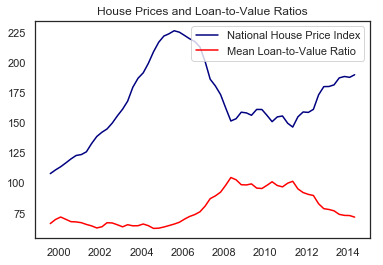

In [162]:
plt.plot(ltv_hpi['hpi_time'], color='navy', label='National House Price Index')
plt.plot(ltv_hpi['LTV_time'], color='red', label='Mean Loan-to-Value Ratio')

plt.title('House Prices and Loan-to-Value Ratios')
plt.legend(loc='upper right')

In [163]:
ltv_hpi.head()

,time,LTV_time,hpi_time
1999-07-31,1,66.430072,107.83
1999-10-31,2,69.810916,110.90
2000-01-31,3,71.852932,113.56
2000-04-30,4,69.963902,116.69
2000-07-31,5,68.005100,120.03


[Text(0, 0.5, 'Mean Loan-to-Value Ratio'),
 Text(0.5, 0, 'National House Price Index')]

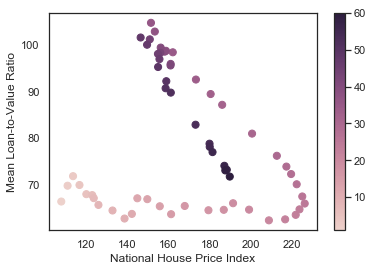

In [164]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

x = ltv_hpi['hpi_time']
y = ltv_hpi['LTV_time']
z = ltv_hpi['time']

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(x, y, c=z, s=50, cmap=cmap)
f.colorbar(points)
ax.set(xlabel='National House Price Index', ylabel='Mean Loan-to-Value Ratio')



In [165]:
# Create variables for percent of balance paid off and percent of time on loan elapsed
df['elapsed_perc'] = (df.time - df.orig_time)/(df.mat_time - df.orig_time)

df['perc_bal_paid'] = (df.balance_orig_time - df.balance_time)/df.balance_orig_time


In [166]:
quarters = pd.Series(pd.date_range(start='1999-07-01', periods=60, freq='3M').to_period("Q"))
df_time_list = pd.Series(range(1,61))
date_index = pd.concat([df_time_list, quarters], axis=1)
date_index.columns = ['Time', 'Quarter']

In [167]:
df = df.merge(date_index, left_on = 'time', right_on = 'Time', how = 'left')

In [168]:
df.head(20)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,elapsed_perc,perc_bal_paid,Time,Quarter
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,69.4,9.2,87.03,0,0,0,0.266667,0.082146,25,2005Q3
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,69.4,9.2,87.03,0,0,0,0.275000,0.087512,26,2005Q4
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,69.4,9.2,87.03,0,0,0,0.283333,0.093235,27,2006Q1
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,69.4,9.2,87.03,0,0,0,0.291667,0.100358,28,2006Q2
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,69.4,9.2,87.03,0,0,0,0.300000,0.102954,29,2006Q3
5,1,30,-7,25,113,40127.97,25.318291,9.2,212.73,2.274218,...,69.4,9.2,87.03,0,0,0,0.308333,0.108267,30,2006Q4
6,1,31,-7,25,113,39718.66,26.566117,9.2,200.67,1.850689,...,69.4,9.2,87.03,0,0,0,0.316667,0.117363,31,2007Q1
7,1,32,-7,25,113,35877.03,25.872559,9.2,186.12,1.104163,...,69.4,9.2,87.03,0,0,0,0.325000,0.202733,32,2007Q2
8,1,33,-7,25,113,34410.03,25.584425,9.2,180.52,0.836859,...,69.4,9.2,87.03,0,0,0,0.333333,0.235333,33,2007Q3
9,1,34,-7,25,113,33590.47,26.008073,9.2,173.35,-0.314448,...,69.4,9.2,87.03,0,0,0,0.341667,0.253545,34,2007Q4


In [169]:
# Create dataframe of macro variables
macros = df.groupby('time')[['hpi_time','gdp_time','uer_time']].mean().reset_index()
macros = macros.merge(date_index, left_on = 'time', right_on = 'Time', how = 'left')
macros = macros.set_index('Quarter')
macros.index = pd.date_range(start='1999-07-01', periods=60, freq='3M')

In [170]:
macros.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1999-07-31 to 2014-04-30
Freq: 3M
Data columns (total 5 columns):
time        60 non-null int64
hpi_time    60 non-null float64
gdp_time    60 non-null float64
uer_time    60 non-null float64
Time        60 non-null int64
dtypes: float64(3), int64(2)
memory usage: 2.8 KB


Text(0.5, 1.0, 'National House Price Index')

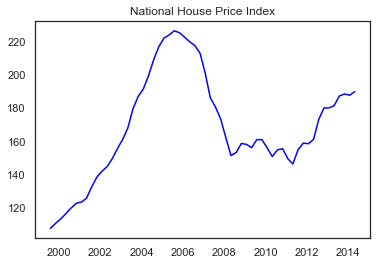

In [171]:
%matplotlib inline

# Plot the house price index time series in blue
plt.plot(macros['hpi_time'], color='blue', label='National House Price Index')
plt.title('National House Price Index')

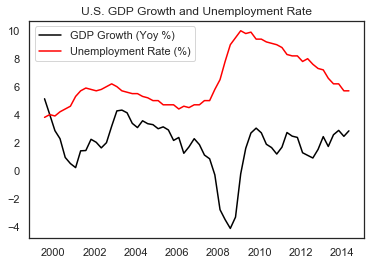

In [172]:
%matplotlib inline

# Plot the house price index time series in blue
plt.plot(macros['gdp_time'], color='black', label='GDP Growth (Yoy %)')
plt.plot(macros['uer_time'], color='red', label='Unemployment Rate (%)')

plt.title('U.S. GDP Growth and Unemployment Rate')
plt.legend(loc='upper left')

In [173]:
# Create dataframe of total mortgages and number of defaults and payoffs in each quarter
defaults = df.groupby('time')[['id','default_time','payoff_time']].agg({'id':'count',
                                                                       'default_time':'sum',
                                                                       'payoff_time':'sum'}).reset_index()
defaults.columns = ['time','mortgages', 'defaults', 'payoffs']

In [174]:
# Set index to quarters
defaults.index = pd.date_range(start='1999-07-01', periods=60, freq='3M')

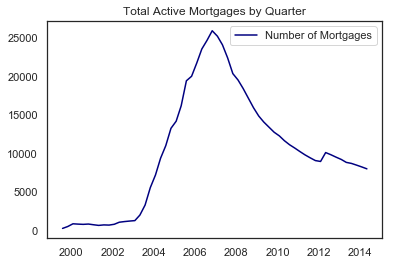

In [175]:
%matplotlib inline

# Plot the share of defaults and payoffs
plt.plot(defaults['mortgages'], color='navy', label = 'Number of Mortgages')

plt.title('Total Active Mortgages by Quarter')
plt.legend(loc='upper right')

In [176]:
# Create share of mortgages in each period defaulting and being paid off
defaults['def_percent'] = defaults['defaults']/defaults['mortgages']
defaults['payoff_percent'] = defaults['payoffs']/defaults['mortgages']

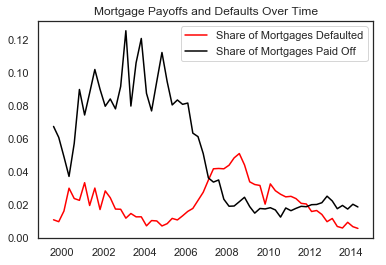

In [177]:
%matplotlib inline

# Plot the share of defaults and payoffs
plt.plot(defaults['def_percent'], color='red', label='Share of Mortgages Defaulted')
plt.plot(defaults['payoff_percent'], color='black', label='Share of Mortgages Paid Off')

plt.title('Mortgage Payoffs and Defaults Over Time')
plt.legend(loc='upper right')

In [178]:
# View top of dataframe
df.head(5)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,elapsed_perc,perc_bal_paid,Time,Quarter
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,69.4,9.2,87.03,0,0,0,0.266667,0.082146,25,2005Q3
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,69.4,9.2,87.03,0,0,0,0.275000,0.087512,26,2005Q4
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,69.4,9.2,87.03,0,0,0,0.283333,0.093235,27,2006Q1
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,69.4,9.2,87.03,0,0,0,0.291667,0.100358,28,2006Q2
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,69.4,9.2,87.03,0,0,0,0.300000,0.102954,29,2006Q3


Verify there are 50,000 unique mortgages in the dataset

In [36]:
mortgage_count = len(df.groupby('id').count().reset_index().index)
f'There are {mortgage_count} unique mortgages in the dataset'

'There are 50000 unique mortgages in the dataset'

To calculate the number of mortgages in dataset that are censored, sum the 'default time' and 'payoff time'

In [40]:
censored_counts = df[['default_time','payoff_time']].sum()
print(censored_counts)

default_time    15158
payoff_time     26589
dtype: int64


In [47]:
f'Out of the total {mortgage_count} unique mortgages, {censored_counts[0]} defaulted and {censored_counts[1]} were paid off within the time frame of the dataset'

'Out of the total 50000 unique mortgages, 15158 defaulted and 26589 were paid off within the time frame of the dataset'

In [48]:
f'The remaining {mortgage_count - censored_counts.sum()} mortgages are right-censored because we do not observe default or payoff.'

'The remaining 8253 mortgages are right-censored because we do not observe default or payoff.'

In [49]:
f'For techniques that cannot use censored observations {(mortgage_count - censored_counts.sum())/mortgage_count*100}% of the mortgages need to be thrown out.'

'For techniques that cannot use censored observations 16.506% of the mortgages need to be thrown out.'

Text(0.5, 1.0, 'Periods Observed per Mortgage')

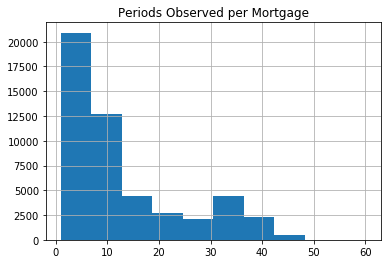

In [25]:
%matplotlib inline

# Return the numbers of months of data in dataset for each unique mortgage
months_per_loan = df.groupby('id')['id'].count().reset_index(drop=True)
mpl_df = pd.DataFrame(months_per_loan)

mpl_df.hist()
plt.title("Periods Observed per Mortgage")

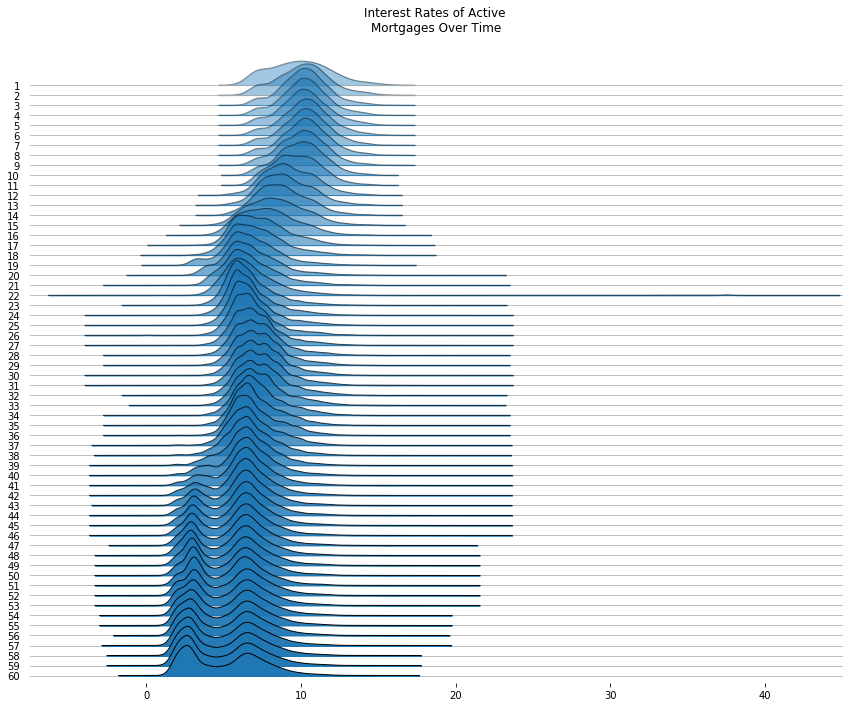

In [26]:
%matplotlib inline

#labels=[y if y%10==0 else None for y in list(df.id.unique())]
fig, axes = joypy.joyplot(df, by="time", column="interest_rate_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(12,10),
                          title="Interest Rates of Active \nMortgages Over Time",
                          kind="kde", bins=20)

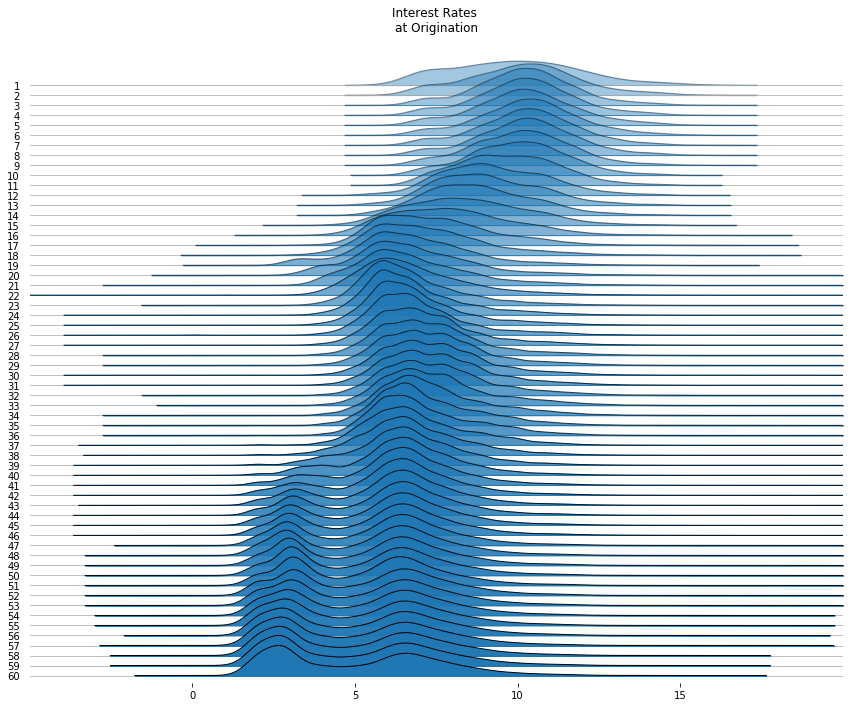

In [30]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="time", column="interest_rate_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(12,10),
                          title="Distribution of Interest Rates over Time",
                          kind="kde", bins=20,
                          x_range=[-5,20])

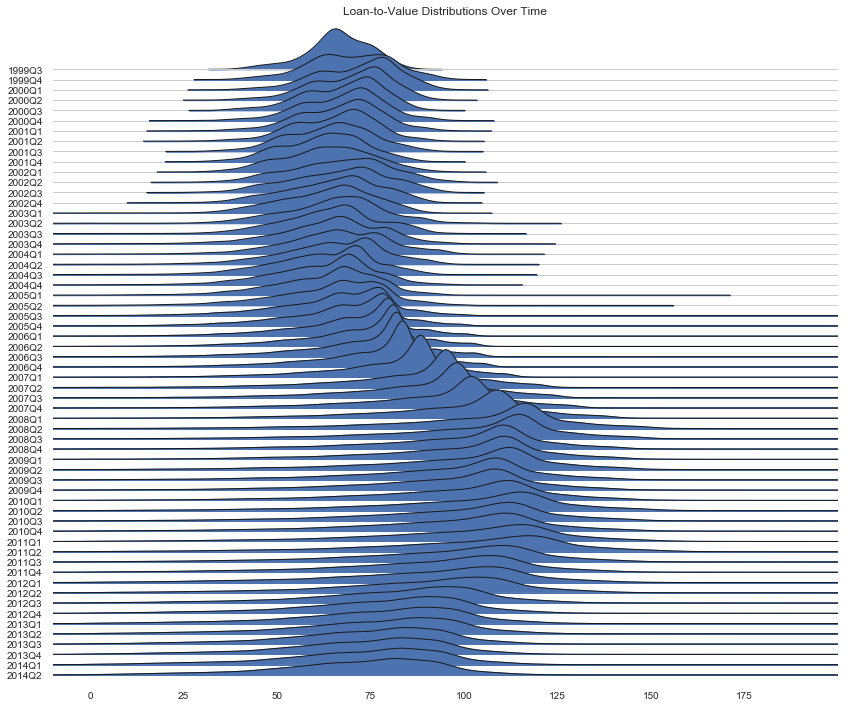

In [179]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Quarter", column="LTV_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=False, figsize=(12,10),
                          title="Loan-to-Value Distributions Over Time",
                          kind="kde", bins=20,
                          x_range=[-10,200])

In [180]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,elapsed_perc,perc_bal_paid,Time,Quarter
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,69.4,9.2,87.03,0,0,0,0.266667,0.082146,25,2005Q3
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,69.4,9.2,87.03,0,0,0,0.275000,0.087512,26,2005Q4
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,69.4,9.2,87.03,0,0,0,0.283333,0.093235,27,2006Q1
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,69.4,9.2,87.03,0,0,0,0.291667,0.100358,28,2006Q2
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,69.4,9.2,87.03,0,0,0,0.300000,0.102954,29,2006Q3


In [181]:
df.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'elapsed_perc',
       'perc_bal_paid', 'Time', 'Quarter'],
      dtype='object')

In [182]:
df['type'] = df['REtype_CO_orig_time'] + 2*df['REtype_PU_orig_time'] + 3*df['REtype_SF_orig_time']

In [183]:
type_lookup = {1:"Condo",
              2:"Urban Development",
              3:"Single Family"}

In [184]:
df['mortgage_type'] = df['type'].map(type_lookup)


In [185]:
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,hpi_orig_time,default_time,payoff_time,status_time,elapsed_perc,perc_bal_paid,Time,Quarter,type,mortgage_type
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,87.03,0,0,0,0.266667,0.082146,25,2005Q3,3,Single Family
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,87.03,0,0,0,0.275000,0.087512,26,2005Q4,3,Single Family
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,87.03,0,0,0,0.283333,0.093235,27,2006Q1,3,Single Family
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,87.03,0,0,0,0.291667,0.100358,28,2006Q2,3,Single Family
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,87.03,0,0,0,0.300000,0.102954,29,2006Q3,3,Single Family


In [197]:
def_by_type = df.groupby(['id','mortgage_type'])[['default_time','payoff_time']].agg({'default_time':'sum',
                                        'payoff_time':'sum'}).reset_index()

def_by_type = def_by_type.groupby('mortgage_type')['id','default_time','payoff_time'].agg({'id':'count',
                                                                                           'default_time':'sum',
                                                                                           'payoff_time':'sum'}).reset_index()

def_by_type.columns = ['Mortgage Type', 'Count', 'Defaults', 'Paid Off']

In [200]:
def_by_type['Default Percent'] = def_by_type['Defaults']/def_by_type['Count']*100
def_by_type['Paid Off Percent'] = def_by_type['Paid Off']/def_by_type['Count']*100


In [201]:
def_by_type.head()

,Mortgage Type,Count,Defaults,Paid Off,Default Percent,Paid Off Percent
0,Condo,3250,1023,1718,31.476923,52.861538
1,Single Family,31192,9444,16662,30.276994,53.417543
2,Urban Development,5795,1853,3029,31.975841,52.269198


In [ ]:
def_by_type = df.groupby(['id','mortgage_type'])[['time','default_time','payoff_time']].agg({'time':'count',
                                        'default_time':'sum',
                                        'payoff_time':'sum'}).reset_index()

def_by_type.columns = ['ID','Type','Count','Defaults','Paid Off']

In [188]:
def_by_type

,ID,Type,Count,Defaults,Paid Off
0,1,Single Family,24,1,0
1,2,Single Family,2,0,1
2,3,Single Family,5,0,1
3,4,Single Family,35,0,0
4,5,Single Family,3,0,1
5,6,Single Family,31,1,0
6,7,Single Family,2,0,1
7,8,Single Family,1,0,1
8,9,Single Family,13,1,0
9,10,Single Family,5,1,0


In [34]:
FICO_scores = df.loc[(df['orig_time'] == df['time']), ['time','FICO_orig_time']]

In [35]:
FICO_scores.head()

,time,FICO_orig_time
2387,19,560
2390,19,621
2434,24,516
2437,23,657
2454,23,503


In [1]:
ir.reset_index().iloc[:, 1:4]

NameError: name 'ir' is not defined

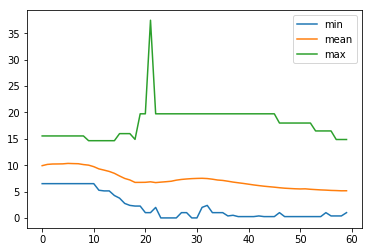

In [48]:
# Plot min/mean/max of each period's reported interest rate to see evolution over time
ir.reset_index().iloc[:, 1:4].plot()

In [49]:
# Create min/max GDP for each period to plot to see if they are the same for each of the 60 periods
hpi = df.groupby('time')['hpi_time'].agg({'min':'min',
                                   'max':'max'})

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


# Regression Models

To model whether a loan defaults or not using regression, we need to drop all right-censored observations since we do not know if they default or not.

In [60]:
# Filter based on rows that only have non-zero value for 'status_time' which means they were either defaulted on or fully paid
df_reg = df.loc[df.status_time > 0 , ]

In [ ]:
For binary 

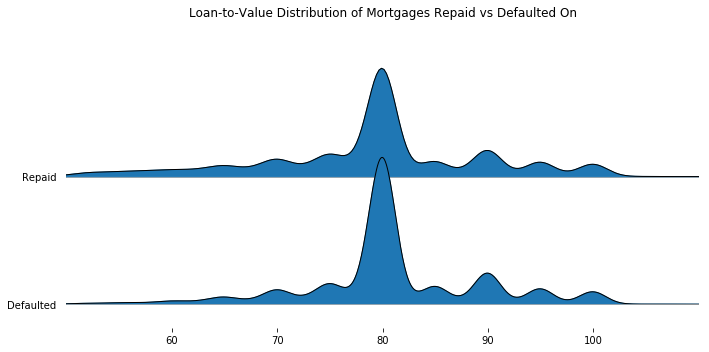

In [76]:
# Create plot to see difference in distribution of loan-to-value for mortgages that defaulted and those that were repaid
%matplotlib inline

fig, axes = joypy.joyplot(df_reg, by="default_time", column="LTV_orig_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(10,10),
                          labels = ['Repaid', 'Defaulted'],
                          title="Loan-to-Value Distribution of Mortgages Repaid vs Defaulted On",
                          kind="kde", bins=20,
                          x_range=[50,110])

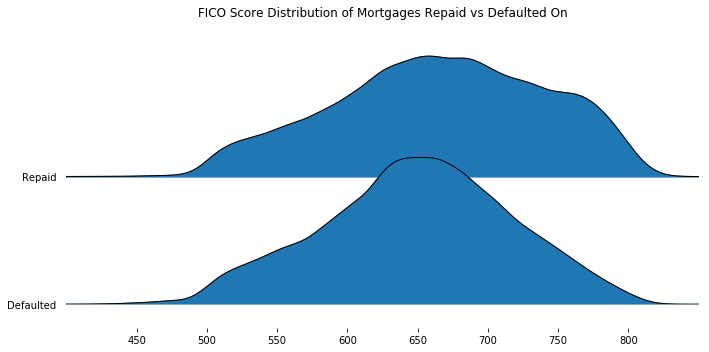

In [78]:
# Create plot to see difference in distribution of FICO Scores for mortgages that defaulted and those that were repaid
%matplotlib inline

fig, axes = joypy.joyplot(df_reg, by="default_time", column="FICO_orig_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(10,5),
                          labels = ['Repaid', 'Defaulted'],
                          title="FICO Score Distribution of Mortgages Repaid vs Defaulted On",
                          kind="kde", bins=20,
                          x_range=[400, 850])

In [61]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41747 entries, 23 to 622349
Data columns (total 23 columns):
id                         41747 non-null int64
time                       41747 non-null int64
orig_time                  41747 non-null int64
first_time                 41747 non-null int64
mat_time                   41747 non-null int64
balance_time               41747 non-null float64
LTV_time                   41735 non-null float64
interest_rate_time         41747 non-null float64
hpi_time                   41747 non-null float64
gdp_time                   41747 non-null float64
uer_time                   41747 non-null float64
REtype_CO_orig_time        41747 non-null int64
REtype_PU_orig_time        41747 non-null int64
REtype_SF_orig_time        41747 non-null int64
investor_orig_time         41747 non-null int64
balance_orig_time          41747 non-null float64
FICO_orig_time             41747 non-null int64
LTV_orig_time              41747 non-null float64
Interest_

## Linear Regression

In [63]:
# import statsmodels
import statsmodels.api as sm

# Set X, y variables; y is binary (1 = default, 0 = loan repaid), X variables are FICO credit score
# and loan-to-value (ratio of mortgage to collateral) at time of originaiton
X = df_reg[["FICO_orig_time", "LTV_orig_time"]] 
y = df_reg["default_time"]

# Fit probit model from statsmodel API and make predictions
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           default_time   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:05:04   Log-Likelihood:                -28426.
No. Observations:               41747   AIC:                         5.686e+04
Df Residuals:                   41745   BIC:                         5.687e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
FICO_orig_time    -0.0003   2.06e-05    -12.791      0.000      -0.000      -0.000
LTV_orig_time      0.0067      0.000     39.307      0.000       0.006       0.007
==============================================================================
Omnibus:                   200985.313   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.387
Skew:                           0.540   Prob(JB):                         0.00
Kurtosis:                       1.381   Cond. No.                         48.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
df_reg.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
23,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
25,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
68,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2
99,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,1,0,212000.0,670,80.0,6.580,191.42,1,0,1


In [67]:
predictions.head()

23    0.282998
25    0.433998
30    0.361670
68    0.456795
99    0.353965
dtype: float64

## Probit

The probit uses the normal CDF as the link function for the binary outcome, in this case whether a mortgage defaults or not.

In [65]:
# Set X, y variables the same as in the linear regression
X = df_reg[["FICO_orig_time", "LTV_orig_time"]] 
y = df_reg["default_time"]

# Fit probit model from statsmodel API and make predictions
model = sm.Probit(y, X).fit()
predictions = model.predict(X)

# Print out model statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.645694
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:           default_time   No. Observations:                41747
Model:                         Probit   Df Residuals:                    41745
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Apr 2019   Pseudo R-squ.:                 0.01447
Time:                        19:14:06   Log-Likelihood:                -26956.
converged:                       True   LL-Null:                       -27352.
                                        LLR p-value:                3.394e-174
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
FICO_orig_time    -0.0019   5.74e-05    -32.416      0.000      -0.002      -0.002
LTV_orig_time      0.0109      0.000     23.242      0.000       0.010       0.012
==================================================================================
"""

## Logit

In [66]:
# Set X, y variables the same as in the linear regression
X = df_reg[["FICO_orig_time", "LTV_orig_time"]] 
y = df_reg["default_time"]

# Fit probit model from statsmodel API and make predictions
logit_model = sm.Logit(y, X).fit()
predictions = model.predict(X)

# Print out model statistics
model.summary2()

Optimization terminated successfully.
         Current function value: 0.645856
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Probit
==================================================================
Model:              Probit           Pseudo R-squared: 0.014      
Dependent Variable: default_time     AIC:              53915.5775 
Date:               2019-04-23 19:16 BIC:              53932.8563 
No. Observations:   41747            Log-Likelihood:   -26956.    
Df Model:           1                LL-Null:          -27352.    
Df Residuals:       41745            LLR p-value:      3.3942e-174
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
FICO_orig_time    -0.0019   0.0001 -32.4161 0.0000 -0.0020 -0.0017
LTV_orig_time      0.0109   0.0005  23.2425 0.0000  0.0100  0.0118
==================================================================

"""